In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
dt=1e-2

def loglike(q):
    return np.exp(-q**2)
def derloglike(q):
    return-2*q

def leapfrog(q, p, delta_t=1e-1, niter=5):
    qnew=q
    pnew=p
    for i in range(niter):
        pnew=pnew + 0.5 * delta_t * derloglike(qnew) #La ecuación a solucionar
        qnew=qnew + delta_t * pnew #dH/dp =p
        pnew=pnew + 0.5 * delta_t * derloglike(qnew)
    pnew=pnew
    return qnew, pnew

def H(q, p):
    T=0.5*p**2
    V=-loglike(q)
    return T+V

In [45]:
def MCMC(nsteps):
    q = np.zeros(nsteps)
    p = np.zeros(nsteps)
    p[0] = np.random.normal(0, 1)
    q[0] = np.random.normal(0, 1)
    for i in range(1, nsteps):
        p[i] = np.random.normal(0, 1)
        qnew, pnew = leapfrog(q[i-1], p[i-1])
        Enew = H(qnew, pnew)
        Eold=H(q[i-1], p[i-1])
        alpha=min(1., np.exp(-Enew+Eold))
        beta=np.random.random()
        if beta < alpha :
            q[i]=qnew
        else:
            q[i]=q[i-1]
    return q
    

In [50]:
qchain=MCMC(100000)

(array([  2624.,   1790.,   2610.,   4292.,   3717.,   3743.,   4126.,
          4877.,   7577.,  10257.,   8132.,   5079.,   4330.,   4637.,
          3713.,   5389.,   6651.,   7801.,   5230.,   2925.]),
 array([-5.78438076, -5.17909482, -4.57380889, -3.96852295, -3.36323702,
        -2.75795108, -2.15266515, -1.54737921, -0.94209328, -0.33680735,
         0.26847859,  0.87376452,  1.47905046,  2.08433639,  2.68962233,
         3.29490826,  3.9001942 ,  4.50548013,  5.11076607,  5.716052  ,
         6.32133794]),
 <a list of 20 Patch objects>)

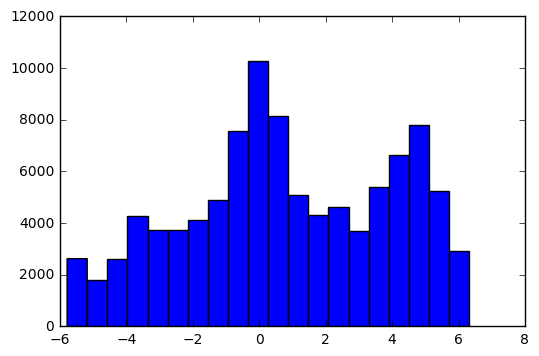

In [51]:
plt.hist(qchain[500:], bins=20)